### Correlation (in "data land")

<a href="https://colab.research.google.com/github/ioskn/mldl_htwg/blob/master/intro/cor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook demonstrates how to compute the (empirical) correlation coefficient between two variables.
Empirical in this case means that we compute the correlation coefficient from a sample of data, rather than from the distributions. So we compute in "data land" rather than in "probability land".


In [32]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import numpy as np
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
Features = heart_disease.data.features
#heart_disease.data.targets #0 = no heart disease, 4 = severe heart disease

xr = Features.age #age in years
yr = Features.trestbps #resting blood pressure (in mm Hg on admission to the hospital)

Text(0, 0.5, 'SBP (mm Hg)')

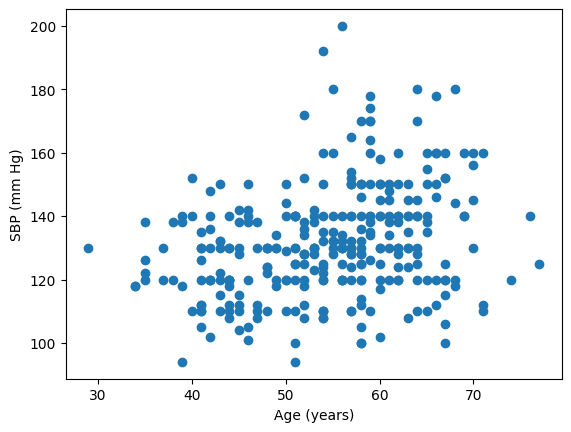

In [33]:
# Plot age vs. resting blood pressure
plt.scatter(xr, yr)
plt.xlabel("Age (years)")
plt.ylabel("SBP (mm Hg)")

### Scaling
It makes no sense to compare age (in years) with Blood Pressure (in mm Hg). We would compare apples with oranges.
So we scale the data to have mean 0 and standard deviation 1. This is called "standardization" or "z-score normalization" and we loose the units of measurement.

This scaling is done via
$$
x \mapsto z(x) = \frac{x - \mu}{\sigma}
$$
where $\mu$ is the mean and $\sigma$ is the standard deviation. 


In [34]:
y = (yr - np.mean(yr))/np.std(yr)
x = (xr - np.mean(xr))/np.std(xr)

In [35]:
print(np.mean(x), np.std(x))

-1.4656409566008667e-18 0.9999999999999999


In [36]:
# Scaling can be done with sklearn.preprocessing.scale
from sklearn.preprocessing import scale
xd = scale(xr)
np.max(xd-x)

0.0

Text(0, 0.5, 'SBP (standardized)')

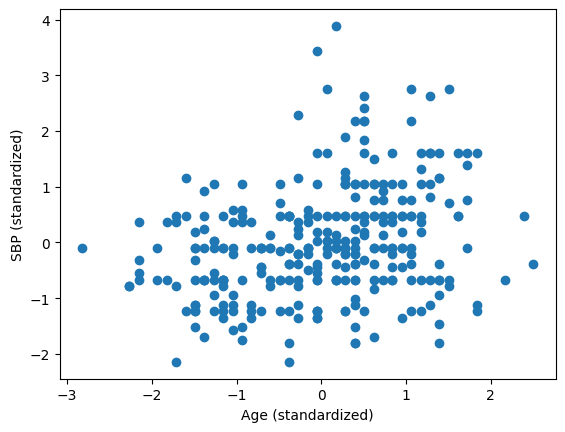

In [41]:
plt.scatter(x, y)
plt.xlabel("Age (standardized)")
plt.ylabel("SBP (standardized)")

### Correlation Coefficient (after Pearson)
From the scaled data we compute the correlation coefficient as 
$$
r = \frac{1}{n-1} \sum_{i=1}^n z(x_i) z(y_i)
$$
where $n$ is the number of data points. Don't worry about the $n-1$ in the denominator. It is there to make the correlation coefficient an unbiased estimator of the correlation coefficient of the distributions.

In [38]:
np.sum(x*y)/len(x-1)

0.28494591931369034

The same can be done using the original data and the scipy.stats.pearsonr function.

In [42]:
# Calculate the correlation coefficient using scipy
from scipy.stats import pearsonr
corr, p = pearsonr(x, y)
print(corr)
p # p-value 4.5e-7 what does this mean?

0.2849459193136905


4.547476967620717e-07